In [1]:
import pandas as pd
import numpy as np 
import nltk
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy 
from scipy import spatial
import re
from textblob import TextBlob
sw = nltk.corpus.stopwords.words('english')
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.util import ngrams
from textblob import TextBlob
from textblob import Word
from nltk.stem.snowball import SnowballStemmer
sttemmer = SnowballStemmer("english")
from nltk.stem import PorterStemmer
st = PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [2]:
#ted talk data
data = pd.read_csv("../TED_data.csv")

In [3]:
data

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,...,film_date.minute,film_date.second,published_date.year,published_date.month,published_date.day_of_month,published_date.day_of_week,published_date.hour,published_date.minute,published_date.second,transcript
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25 00:00:00,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,...,0,0,2006,6,27,1,0,11,0,Good morning. How are you?(Laughter)It's been ...
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25 00:00:00,43,Al Gore,Al Gore: Averting the climate crisis,1,...,0,0,2006,6,27,1,0,11,0,"Thank you so much, Chris. And it's truly a gre..."
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24 00:00:00,26,David Pogue,David Pogue: Simplicity sells,1,...,0,0,2006,6,27,1,0,11,0,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26 00:00:00,35,Majora Carter,Majora Carter: Greening the ghetto,1,...,0,0,2006,6,27,1,0,11,0,If you're here today — and I'm very happy that...
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22 00:00:00,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,...,0,0,2006,6,27,1,20,38,0,"About 10 years ago, I took on the task to teac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2548,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06 00:00:00,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,...,0,0,2017,9,19,1,20,0,16,"So, Ma was trying to explain something to me a..."
2546,2549,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24 00:00:00,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,...,0,0,2017,9,20,2,15,2,17,This is a picture of a sunset on Mars taken by...
2547,2550,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24 00:00:00,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,...,0,0,2017,9,21,3,15,1,35,"In my early days as a graduate student, I went..."
2548,2551,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,2017-07-08 00:00:00,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,...,0,0,2017,9,21,3,20,0,42,I took a cell phone and accidentally made myse...


# Converting the columns into string type

In [4]:
data = data[['title','transcript']].astype(str)
data.head()

,title,transcript
0,Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...
1,Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre..."
2,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,Greening the ghetto,If you're here today — and I'm very happy that...
4,The best stats you've ever seen,"About 10 years ago, I took on the task to teac..."


# Text preprocessing

In [5]:
import nltk
nltk.download("stopwords")
sw = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chapa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def  text_processing(df):
    """""=== Lower case ==="""
    df['transcript'] = df['transcript'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    '''=== Removal of stop words ==='''
    #stopsw = stopwords.words('english')
    df['transcript'] = df['transcript'].apply(lambda x: " ".join(x for x in x.split()if x not in sw))
    
    '''=== Spelling Correction === '''
    #df['transcript'].apply(lambda x: str(TextBlob(x).correct()))
    
    '''=== Removal of Punctuation ==='''
    df['transcript'] = df['transcript'].str.replace('[^\w\s]', '')  

    '''=== Removal of Numeric ==='''
    df['transcript'] = df['transcript'].str.replace('[0-9]', '')
    
    return df

In [7]:
data = text_processing(data)
print(data)

                                                  title  \
0                           Do schools kill creativity?   
1                           Averting the climate crisis   
2                                      Simplicity sells   
3                                   Greening the ghetto   
4                       The best stats you've ever seen   
...                                                 ...   
2545  What we're missing in the debate about immigra...   
2546                    The most Martian place on Earth   
2547  What intelligent machines can learn from a sch...   
2548       A black man goes undercover in the alt-right   
2549  How a video game might help us build better ci...   

                                             transcript  
0     good morning. you?(laughter)it's great, it? i'...  
1     thank much, chris. truly great honor opportuni...  
2     (music: "the sound silence," simon & garfunkel...  
3     today — i'm happy — heard sustainable developm...  
4

In [8]:
data['transcript'] = data['transcript'].apply(lambda a: " ".join([st.stem(x) for x in a.split()]))

# converting text to features using count vectorizer

In [9]:
cv =CountVectorizer()
cv.fit(data['transcript'])
# Transform the training data using count vectorizer object
cv_tedfeatures = cv.transform(data['transcript'])


In [10]:
#word level TF-IDF
tv = TfidfVectorizer()
tv.fit(data['transcript'])
tv_tedfeatures =  tv.transform(data['transcript'])


# Loading Pretrained Word2vec

In [11]:

# Load pre-trained word vectors
m1 = gensim.models.KeyedVectors.load_word2vec_format("C:/Users/chapa/Documents/GoogleNews-vectors-negative300.bin", binary=True)

# Function to get the embeddings
def get_embedding(x, out=False):
    if x in m1:
        if out:
            return m1.get_vector(x)
        else:
            return m1[x]
    else:
        return np.zeros(300)


In [12]:
# Getting means 
op =  {}
for i in data['transcript']:
    avg_vct_doc = (np.mean(np.array([get_embedding(ax) for ax in nltk.word_tokenize((i))]), axis=0))
    dict = { i : (avg_vct_doc) }
    op.update(dict)    
    


In [13]:
results_key = list()
results_value = list()
for key, value in op.items():###########333op
    results_key.append(key)
    results_value.append(np.array(value))


# Implementing K-means to find optimal clusters

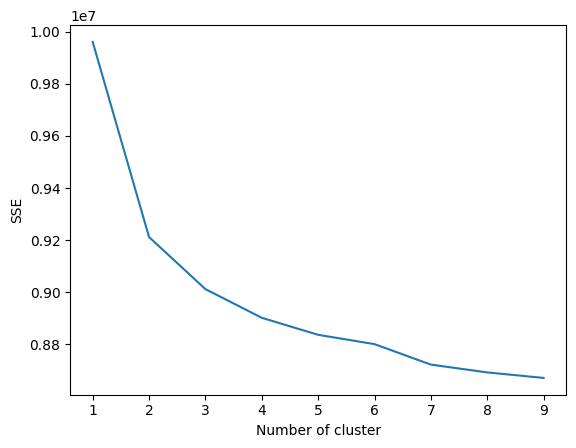

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

elbow_method = {}
for k in range(1, 10):
    kmeans_elbow = KMeans(n_clusters=k,n_init = 2).fit(cv_tedfeatures)
    elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


# Implementing silhouette to find optimal clusters

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster,n_init = 2).fit(cv_tedfeatures)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cv_tedfeatures, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.14453687907898563
For n_clusters=3, The Silhouette Coefficient is 0.07480842930244001
For n_clusters=4, The Silhouette Coefficient is 0.06634239981992898
For n_clusters=5, The Silhouette Coefficient is 0.009528220236327368
For n_clusters=6, The Silhouette Coefficient is 0.014452165616861775
For n_clusters=7, The Silhouette Coefficient is 0.017137371301658787
For n_clusters=8, The Silhouette Coefficient is -0.007823189588999292
For n_clusters=9, The Silhouette Coefficient is 0.0029230332980384847
For n_clusters=10, The Silhouette Coefficient is -0.010563256345076011
For n_clusters=11, The Silhouette Coefficient is -0.02075767002428317
For n_clusters=12, The Silhouette Coefficient is -0.0027005881003518474
For n_clusters=13, The Silhouette Coefficient is -0.04727199917437166
For n_clusters=14, The Silhouette Coefficient is -0.016384378619329724


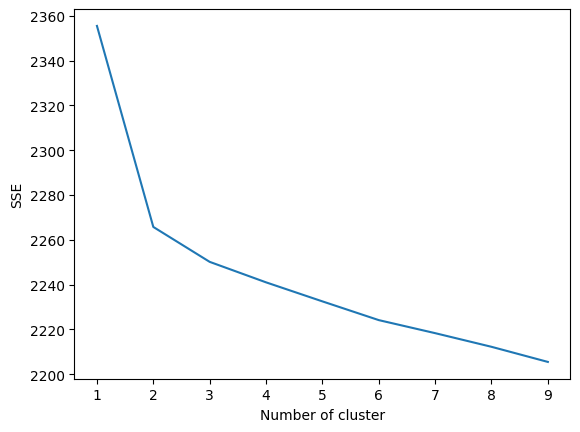

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

elbow_method = {}
for k in range(1, 10):
    kmeans_elbow = KMeans(n_clusters=k,n_init=10).fit(tv_tedfeatures)
    elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster,n_init=10).fit(tv_tedfeatures)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cv_tedfeatures, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is -0.19411316433868556
For n_clusters=3, The Silhouette Coefficient is -0.18155055831842087
For n_clusters=4, The Silhouette Coefficient is -0.17986670347266084
For n_clusters=5, The Silhouette Coefficient is -0.1790399491471372
For n_clusters=6, The Silhouette Coefficient is -0.18035421420273673
For n_clusters=7, The Silhouette Coefficient is -0.17441561100465383
For n_clusters=8, The Silhouette Coefficient is -0.17255505166788324
For n_clusters=9, The Silhouette Coefficient is -0.1739585356863497
For n_clusters=10, The Silhouette Coefficient is -0.17040775548864207
For n_clusters=11, The Silhouette Coefficient is -0.17197340386295254
For n_clusters=12, The Silhouette Coefficient is -0.17168741214784086
For n_clusters=13, The Silhouette Coefficient is -0.16934436968577565
For n_clusters=14, The Silhouette Coefficient is -0.1704065791626342


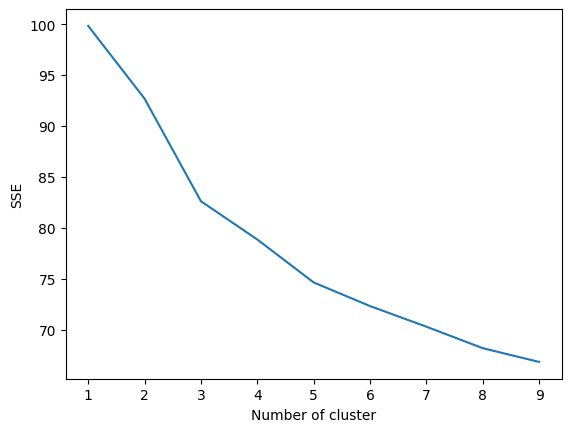

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

elbow_method = {}
for k in range(1, 10):
    kmeans_elbow = KMeans(n_clusters=k,n_init=10).fit(results_value)
    elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster,n_init = 10).fit(results_value)
    label = kmeans.labels_
    sil_coeff = silhouette_score(results_value, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.918796332819177
For n_clusters=3, The Silhouette Coefficient is 0.08260116188395426
For n_clusters=4, The Silhouette Coefficient is 0.0857736105775633
For n_clusters=5, The Silhouette Coefficient is 0.070209726486091
For n_clusters=6, The Silhouette Coefficient is 0.04369840180045386
For n_clusters=7, The Silhouette Coefficient is 0.05039952522113174
For n_clusters=8, The Silhouette Coefficient is 0.04880331176821931
For n_clusters=9, The Silhouette Coefficient is 0.051589945878924834
For n_clusters=10, The Silhouette Coefficient is 0.04821669860676705
For n_clusters=11, The Silhouette Coefficient is 0.04088290780200159
For n_clusters=12, The Silhouette Coefficient is 0.040002099518208774
For n_clusters=13, The Silhouette Coefficient is 0.040532815710387034
For n_clusters=14, The Silhouette Coefficient is 0.03845211559861545


In [20]:
print(cv_tedfeatures.shape)
print(tv_tedfeatures.shape)

print(len(results_value))

(2550, 57587)
(2550, 57587)
2465


# Clustering 

In [21]:
segments = KMeans(n_clusters=2)
segments.fit(results_value)
#segment outputsfinal clusters
output = segments.labels_.tolist()

ted_segmentaion =  {'transcript': results_key, 'cluster': output}
output_df = pd.DataFrame(ted_segmentaion)
#talks per segment 
output_df['cluster'] = segments.labels_.tolist()

output_df['cluster'].value_counts()

C:\Users\chapa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    1260
0    1205
Name: count, dtype: int64

In [22]:
cluster_1 = output_df[output_df.cluster == 1]
cluster_0 = output_df[output_df.cluster == 0]


# Word cloud for cluster 1

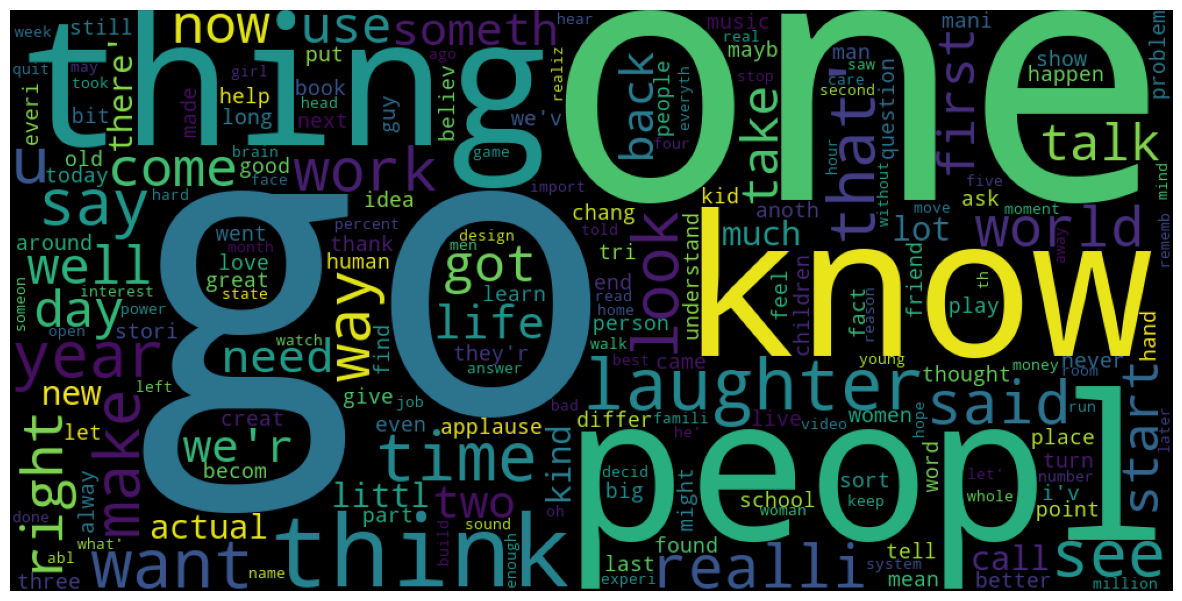

In [23]:
# cluster 1 visualization

from wordcloud import WordCloud, STOPWORDS

# Mono Gram

wordcloud = WordCloud(width = 1000, height = 500,collocations = False).generate_from_text(' '.join(cluster_1['transcript']))
# Generate plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Word cloud for cluster 2

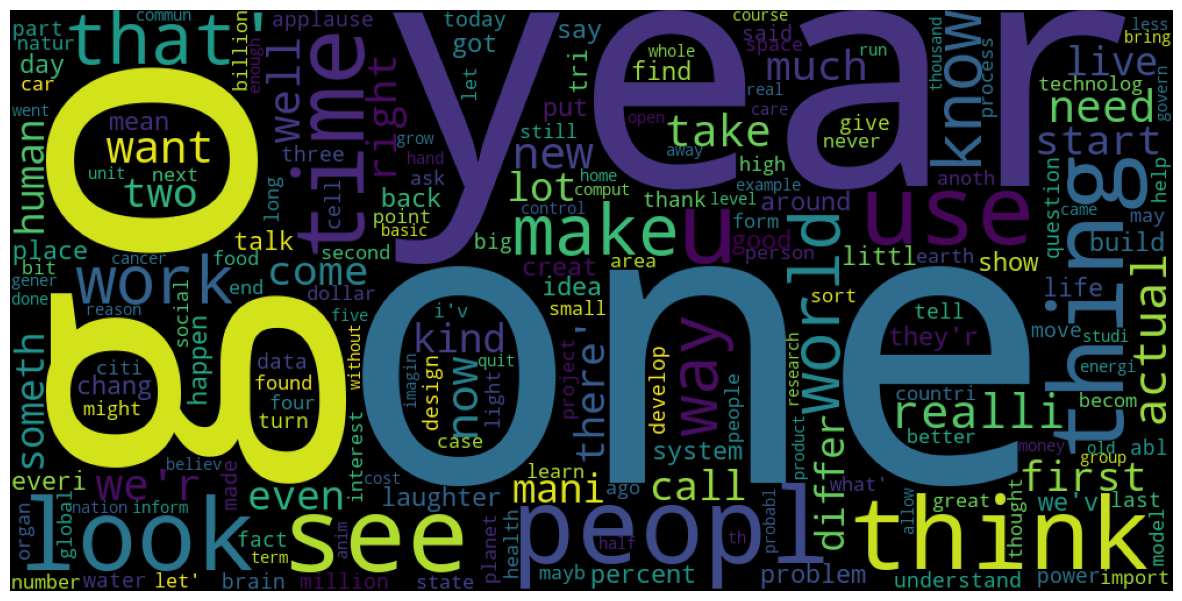

In [24]:
# similarlySimilarly for segment 0 visualization
wordcloud = WordCloud(width = 1000, height = 500,collocations = False).generate_from_text(' '.join(cluster_0['transcript']))
 
# Generate plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
def process(doc):
    toks = [w for s in nltk.sent_tokenize(doc) for w in nltk.word_tokenize(s)]
    filt_toks = []
    for i in toks:
        if re.search('[a-zA-Z]', i):
            filt_toks.append(i)
    post_process = [st.stem(t) for t in filt_toks]
    return post_process

# Topic Modeling

In [26]:
#import
from gensim import corpora, models, similarities 


toks = [process(a) for a in cluster_1.transcript]

talks = [[x for x in y if  x not in sw] for y in toks]


#dictionary from text
dictionary = corpora.Dictionary(talks)

#remove 
#dictionary.filter_extremes(no_below=1, no_above=0.8)
#
#dict to bowbag of words
doc = [dictionary.doc2bow(text) for text in talks]

#topic modeling
tm = models.LdaModel(doc, num_topics=5)

tm.show_topics()

[(0,
  '0.009*"298" + 0.008*"306" + 0.008*"404" + 0.008*"227" + 0.007*"383" + 0.007*"443" + 0.006*"562" + 0.006*"220" + 0.006*"488" + 0.005*"628"'),
 (1,
  '0.010*"227" + 0.009*"306" + 0.009*"383" + 0.008*"564" + 0.008*"293" + 0.008*"562" + 0.007*"220" + 0.007*"609" + 0.007*"404" + 0.006*"298"'),
 (2,
  '0.012*"306" + 0.010*"227" + 0.010*"404" + 0.007*"383" + 0.007*"293" + 0.007*"609" + 0.007*"3" + 0.006*"220" + 0.006*"594" + 0.006*"562"'),
 (3,
  '0.011*"404" + 0.011*"383" + 0.010*"227" + 0.008*"564" + 0.008*"306" + 0.007*"562" + 0.006*"293" + 0.006*"220" + 0.006*"633" + 0.006*"482"'),
 (4,
  '0.009*"227" + 0.008*"404" + 0.008*"383" + 0.008*"293" + 0.007*"306" + 0.007*"570" + 0.006*"564" + 0.006*"562" + 0.006*"633" + 0.006*"3"')]

In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(tm, doc, dictionary)################33doc1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.000085 -0.002495       1        1  28.600615
2      0.001676 -0.005048       2        1  23.070958
4      0.003083  0.002287       3        1  21.162928
1      0.002649  0.004043       4        1  15.818277
0     -0.007494  0.001213       5        1  11.347222, topic_info=         Term          Freq         Total Category  logprob  loglift
298  laughter   6970.000000   6970.000000  Default  30.0000  30.0000
306      like  10500.000000  10500.000000  Default  29.0000  29.0000
443         r   6258.000000   6258.000000  Default  28.0000  28.0000
220       get   7235.000000   7235.000000  Default  27.0000  27.0000
488       see   5630.000000   5630.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
293      know    723.773488   8396.514225   Topic5  -5.2345  -0.2749
639      year    539.354422   5115.431762   Topic5  -5.5286  -0.0734
570      time    560.215857   6256.442432   Topic5  -5.4906  -0.2368
564     think    612.776471   7917.228798   Topic5  -5.4009  -0.3826
609      want    513.202708   6544.023081   Topic5  -5.5783  -0.3694

[456 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1          1  0.266688     'd
1          2  0.207632     'd
1          3  0.293403     'd
1          4  0.119049     'd
1          5  0.112956     'd
...      ...       ...    ...
1040       3  0.347699  young
1040       4  0.118490  young
1040       5  0.124317  young
22881      5  0.567033   ♫let
8827       5  0.583123  ♫what

[1128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

In [28]:
# dictionary 
dictionary1 = corpora.Dictionary(talks)

#remove 
#dictionary1.filter_extremes(no_below=1, no_above=0.8)

# bowdictionary to bag of words 
doc1 = [dictionary1.doc2bow(text) for text in talks]

tm2 = models.LdaModel(doc1, num_topics=2)
tm2.show_topics()################tm2

[(0,
  '0.010*"404" + 0.010*"306" + 0.010*"383" + 0.009*"227" + 0.007*"562" + 0.007*"293" + 0.007*"564" + 0.006*"3" + 0.006*"220" + 0.006*"609"'),
 (1,
  '0.010*"227" + 0.007*"306" + 0.007*"404" + 0.007*"383" + 0.007*"298" + 0.006*"220" + 0.006*"293" + 0.006*"633" + 0.006*"564" + 0.006*"451"')]

In [29]:
pyLDAvis.gensim.prepare(tm2, doc1, dictionary1)############doc1

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.004356  0.0       1        1  65.303901
1     -0.004356  0.0       2        1  34.696099, topic_info=         Term          Freq         Total Category  logprob  loglift
298  laughter   7033.000000   7033.000000  Default  30.0000  30.0000
227        go  11203.000000  11203.000000  Default  29.0000  29.0000
451    realli   5522.000000   5522.000000  Default  28.0000  28.0000
477      said   5009.000000   5009.000000  Default  27.0000  27.0000
629     world   4319.000000   4319.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
562     thing   2200.020857   8058.157503   Topic2  -5.2404  -0.2397
594        us   1693.345291   5317.222183   Topic2  -5.5021  -0.0857
3          'm   1809.560426   6844.032973   Topic2  -5.4358  -0.2718
469     right   1442.124875   4444.854019   Topic2  -5.6627  -0.0671
639      year   1518.045164   5184.325635   Topic2  -5.6114  -0.1697

[218 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
3          1  0.735531      'm
3          2  0.264464      'm
21533      1  0.854491  4shbab
21533      2  0.142415  4shbab
11         1  0.671322  actual
...      ...       ...     ...
45976      2  0.841452  wristi
639        1  0.707132    year
639        2  0.292806    year
18420      1  0.800934  yes/no
18420      2  0.200234  yes/no

[324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])